In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# 0. Data Preparation

In [2]:
# Do some basic sanity checks.
stock_dir = '/Users/donaldwhyte/Downloads/Data/Stocks'
num_stock_files = len([f for f in os.listdir(stock_dir)])
num_us_stock_files = len([f for f in os.listdir(stock_dir) if f.endswith('us.txt')])
assert num_stock_files == num_us_stock_files

etf_dir = '/Users/donaldwhyte/Downloads/Data/ETFs'
num_etf_files = len([f for f in os.listdir(etf_dir)])
num_us_etf_files = len([f for f in os.listdir(etf_dir) if f.endswith('us.txt')])
assert num_etf_files == num_us_etf_files

all_files = os.listdir()

In [3]:
# Build structure to map stocks to a numerical index.
sorted_files = sorted(os.listdir(stock_dir) + os.listdir(etf_dir))
all_symbols = [fname.replace('.us.txt', '') for fname in sorted_files]
sid_to_name = {i: name for i, name in enumerate(sorted(all_symbols))}
name_to_sid = {name: sid for sid, name in sid_to_name.items()}

In [4]:
# Load in all stock pricing data.
price_dfs = []
for fname in sorted_files:
    symbol_name = fname.replace('.us.txt', '')
    print(f'Loading pricing data for {symbol_name}')
    
    fpath = os.path.join(stock_dir, fname)
    if not os.path.isfile(fpath):
        fpath = os.path.join(etf_dir, fname)
        
    is_empty = len(open(fpath).read().strip()) == 0
    
    if is_empty:
        print(f'Pricing data for {symbol_name} is empty')
    else:
        df = pd.read_csv(fpath)
        df.columns = [c.lower() for c in df.columns]
        df['date'] = pd.to_datetime(df['date'])
        df['sid'] = name_to_sid[symbol_name]
        price_dfs.append(df)

Loading pricing data for a
Loading pricing data for aa
Loading pricing data for aaap
Loading pricing data for aaba
Loading pricing data for aac
Loading pricing data for aadr
Loading pricing data for aal
Loading pricing data for aamc
Loading pricing data for aame
Loading pricing data for aan
Loading pricing data for aaoi
Loading pricing data for aaon
Loading pricing data for aap
Loading pricing data for aapl
Loading pricing data for aat
Loading pricing data for aau
Loading pricing data for aav
Loading pricing data for aaww
Loading pricing data for aaxj
Loading pricing data for aaxn
Loading pricing data for ab
Loading pricing data for abac
Loading pricing data for abax
Loading pricing data for abb
Loading pricing data for abbv
Loading pricing data for abc
Loading pricing data for abcb
Loading pricing data for abcd
Loading pricing data for abco
Loading pricing data for abdc
Loading pricing data for abe
Loading pricing data for abeo
Loading pricing data for abeow
Loading pricing data for a

Loading pricing data for alfa
Loading pricing data for alfi
Loading pricing data for alg
Loading pricing data for algn
Loading pricing data for algt
Loading pricing data for alim
Loading pricing data for aljj
Loading pricing data for alk
Loading pricing data for alks
Loading pricing data for all
Loading pricing data for all_a
Loading pricing data for all_b
Loading pricing data for all_c
Loading pricing data for all_d
Loading pricing data for all_e
Loading pricing data for all_f
Loading pricing data for alle
Loading pricing data for allt
Loading pricing data for ally
Loading pricing data for ally_a
Loading pricing data for aln
Loading pricing data for alna
Loading pricing data for alny
Loading pricing data for alo
Loading pricing data for alog
Loading pricing data for alot
Loading pricing data for alp_o-cl
Loading pricing data for alp_q
Loading pricing data for alpn
Loading pricing data for alqa
Loading pricing data for alrm
Loading pricing data for alrn
Loading pricing data for alsk
Lo

Loading pricing data for atacu
Loading pricing data for atai
Loading pricing data for atax
Loading pricing data for atec
Loading pricing data for aten
Loading pricing data for atge
Loading pricing data for ath
Loading pricing data for athm
Loading pricing data for athn
Loading pricing data for athx
Loading pricing data for ati
Loading pricing data for atkr
Loading pricing data for atlc
Loading pricing data for atlo
Loading pricing data for atmp
Loading pricing data for atni
Loading pricing data for atnm
Loading pricing data for atnx
Loading pricing data for ato
Loading pricing data for atom
Loading pricing data for atos
Loading pricing data for atr
Loading pricing data for atra
Loading pricing data for atrc
Loading pricing data for atri
Loading pricing data for atro
Loading pricing data for atrs
Loading pricing data for atsg
Loading pricing data for atto
Loading pricing data for attu
Loading pricing data for atu
Loading pricing data for atus
Loading pricing data for atv
Loading pricing

Loading pricing data for biv
Loading pricing data for bivv
Loading pricing data for bizd
Loading pricing data for bjk
Loading pricing data for bjri
Loading pricing data for bjz
Loading pricing data for bk
Loading pricing data for bk_c
Loading pricing data for bkcc
Loading pricing data for bkd
Loading pricing data for bke
Loading pricing data for bkep
Loading pricing data for bkepp
Loading pricing data for bkf
Loading pricing data for bkh
Loading pricing data for bkhu
Loading pricing data for bki
Loading pricing data for bkj
Loading pricing data for bkk
Loading pricing data for bkln
Loading pricing data for bkmu
Loading pricing data for bkn
Loading pricing data for bks
Loading pricing data for bksc
Loading pricing data for bkt
Loading pricing data for bku
Loading pricing data for bkyi
Loading pricing data for bl
Loading pricing data for blbd
Loading pricing data for blcm
Loading pricing data for bld
Loading pricing data for bldp
Loading pricing data for bldr
Loading pricing data for ble

Loading pricing data for cafe
Loading pricing data for cag
Loading pricing data for cah
Loading pricing data for cai
Loading pricing data for caj
Loading pricing data for cake
Loading pricing data for cal
Loading pricing data for cala
Loading pricing data for cald
Loading pricing data for calf
Loading pricing data for cali
Loading pricing data for call
Loading pricing data for calm
Loading pricing data for calx
Loading pricing data for camp
Loading pricing data for camt
Loading pricing data for cane
Loading pricing data for canf
Loading pricing data for cape
Loading pricing data for capl
Loading pricing data for capr
Loading pricing data for car
Loading pricing data for cara
Loading pricing data for carb
Loading pricing data for carg
Loading pricing data for caro
Loading pricing data for cars
Loading pricing data for cart
Loading pricing data for carv
Loading pricing data for carz
Loading pricing data for casc
Loading pricing data for cash
Loading pricing data for casi
Loading pricing 

Loading pricing data for cj
Loading pricing data for cjjd
Loading pricing data for cjnk
Loading pricing data for ckh
Loading pricing data for ckpt
Loading pricing data for ckx
Loading pricing data for cl
Loading pricing data for clar
Loading pricing data for clb
Loading pricing data for clbs
Loading pricing data for clct
Loading pricing data for cld
Loading pricing data for cldc
Loading pricing data for cldr
Loading pricing data for cldt
Loading pricing data for cldx
Loading pricing data for clf
Loading pricing data for clfd
Loading pricing data for clgx
Loading pricing data for clh
Loading pricing data for cli
Loading pricing data for clir
Loading pricing data for clirw
Loading pricing data for clls
Loading pricing data for clm
Loading pricing data for clmt
Loading pricing data for clne
Loading pricing data for clns
Loading pricing data for clns_b
Loading pricing data for clns_c-cl
Loading pricing data for clns_d
Loading pricing data for clns_e
Loading pricing data for clns_g
Loading 

Loading pricing data for csl
Loading pricing data for cslt
Loading pricing data for csm
Loading pricing data for csml
Loading pricing data for csod
Loading pricing data for cspi
Loading pricing data for csq
Loading pricing data for csra
Loading pricing data for css
Loading pricing data for csse
Loading pricing data for cste
Loading pricing data for cstm
Loading pricing data for cstr
Loading pricing data for csu
Loading pricing data for csv
Loading pricing data for cswc
Loading pricing data for cswi
Loading pricing data for csx
Loading pricing data for ctaa
Loading pricing data for ctas
Loading pricing data for ctb
Loading pricing data for ctbb
Loading pricing data for ctbi
Loading pricing data for ctdd
Loading pricing data for ctek
Loading pricing data for ctg
Loading pricing data for cthr
Loading pricing data for ctib
Loading pricing data for ctic
Loading pricing data for ctl
Loading pricing data for ctlt
Loading pricing data for ctmx
Loading pricing data for ctnn
Loading pricing data

Loading pricing data for dht
Loading pricing data for dhvw
Loading pricing data for dhx
Loading pricing data for dhxm
Loading pricing data for dhy
Loading pricing data for dia
Loading pricing data for dial
Loading pricing data for diax
Loading pricing data for dig
Loading pricing data for dim
Loading pricing data for din
Loading pricing data for diod
Loading pricing data for dirt
Loading pricing data for dis
Loading pricing data for disca
Loading pricing data for discb
Loading pricing data for disck
Loading pricing data for dish
Loading pricing data for dit
Loading pricing data for div
Loading pricing data for diva
Loading pricing data for divb
Loading pricing data for divo
Loading pricing data for divy
Loading pricing data for djci
Loading pricing data for djco
Loading pricing data for djd
Loading pricing data for djp
Loading pricing data for dk
Loading pricing data for dkl
Loading pricing data for dks
Loading pricing data for dkt
Loading pricing data for dl
Loading pricing data for d

Loading pricing data for eemv
Loading pricing data for eemx
Loading pricing data for eep
Loading pricing data for eeq
Loading pricing data for ees
Loading pricing data for eet
Loading pricing data for eev
Loading pricing data for eex
Loading pricing data for efa
Loading pricing data for efad
Loading pricing data for efas
Loading pricing data for efav
Loading pricing data for efax
Loading pricing data for efbi
Loading pricing data for efc
Loading pricing data for eff
Loading pricing data for effe
Loading pricing data for efg
Loading pricing data for efii
Loading pricing data for efl
Loading pricing data for efnl
Loading pricing data for efo
Loading pricing data for efoi
Loading pricing data for efr
Loading pricing data for efsc
Loading pricing data for eft
Loading pricing data for efu
Loading pricing data for efv
Loading pricing data for efx
Loading pricing data for efz
Loading pricing data for egan
Loading pricing data for egbn
Loading pricing data for egf
Loading pricing data for eght

Loading pricing data for evep
Loading pricing data for evf
Loading pricing data for evg
Loading pricing data for evgbc
Loading pricing data for evgn
Loading pricing data for evh
Loading pricing data for evhc
Loading pricing data for evi
Loading pricing data for evix
Loading pricing data for evj
Loading pricing data for evk
Loading pricing data for evlmc
Loading pricing data for evlv
Loading pricing data for evm
Loading pricing data for evn
Loading pricing data for evo
Loading pricing data for evok
Loading pricing data for evol
Loading pricing data for evp
Loading pricing data for evr
Loading pricing data for evri
Loading pricing data for evstc
Loading pricing data for evt
Loading pricing data for evtc
Loading pricing data for evv
Loading pricing data for evx
Loading pricing data for evy
Loading pricing data for ew
Loading pricing data for ewa
Loading pricing data for ewbc
Loading pricing data for ewc
Loading pricing data for ewd
Loading pricing data for ewem
Loading pricing data for ew

Loading pricing data for flws
Loading pricing data for flxn
Loading pricing data for flxs
Loading pricing data for fly
Loading pricing data for fm
Loading pricing data for fmao
Loading pricing data for fmat
Loading pricing data for fmax
Pricing data for fmax is empty
Loading pricing data for fmb
Loading pricing data for fmbh
Loading pricing data for fmbi
Loading pricing data for fmc
Loading pricing data for fmci
Loading pricing data for fmcir
Loading pricing data for fmciu
Loading pricing data for fmciw
Loading pricing data for fmdg
Loading pricing data for fmf
Loading pricing data for fmhi
Loading pricing data for fmi
Loading pricing data for fmk
Loading pricing data for fmn
Loading pricing data for fmnb
Loading pricing data for fmo
Loading pricing data for fms
Loading pricing data for fmsa
Loading pricing data for fmx
Loading pricing data for fmy
Loading pricing data for fn
Loading pricing data for fnb
Loading pricing data for fnb_e
Loading pricing data for fnbg
Loading pricing data 

Loading pricing data for geb
Loading pricing data for gec
Loading pricing data for gecc
Loading pricing data for geccl
Loading pricing data for gef-b
Loading pricing data for gef
Loading pricing data for geh
Loading pricing data for gek
Loading pricing data for gel
Loading pricing data for gem
Loading pricing data for gemp
Loading pricing data for gen
Loading pricing data for genc
Loading pricing data for gene
Loading pricing data for geny
Loading pricing data for geo
Loading pricing data for geos
Loading pricing data for ger
Loading pricing data for gern
Loading pricing data for ges
Loading pricing data for geur
Loading pricing data for gevo
Loading pricing data for gex
Loading pricing data for gf
Loading pricing data for gfa
Loading pricing data for gfed
Loading pricing data for gff
Loading pricing data for gfi
Loading pricing data for gfn
Loading pricing data for gfncp
Loading pricing data for gfnsl
Loading pricing data for gfy
Loading pricing data for gg
Loading pricing data for gg

Loading pricing data for gva
Loading pricing data for gval
Loading pricing data for gvi
Loading pricing data for gvip
Loading pricing data for gvp
Loading pricing data for gwb
Loading pricing data for gwgh
Loading pricing data for gwph
Loading pricing data for gwr
Loading pricing data for gwre
Loading pricing data for gwrs
Loading pricing data for gww
Loading pricing data for gwx
Loading pricing data for gxc
Loading pricing data for gxf
Loading pricing data for gxg
Loading pricing data for gxp
Loading pricing data for gyb
Loading pricing data for gyc
Loading pricing data for gyen
Loading pricing data for gyld
Loading pricing data for gyro
Loading pricing data for gzt
Loading pricing data for h
Loading pricing data for ha
Loading pricing data for habt
Loading pricing data for hack
Loading pricing data for hacv
Loading pricing data for hacw
Loading pricing data for hae
Loading pricing data for hafc
Loading pricing data for haha
Loading pricing data for hain
Loading pricing data for hair


Loading pricing data for hx
Loading pricing data for hxl
Loading pricing data for hy
Loading pricing data for hyacu
Loading pricing data for hyb
Loading pricing data for hyd
Loading pricing data for hydb
Loading pricing data for hydd
Loading pricing data for hyem
Loading pricing data for hyg
Loading pricing data for hygh
Loading pricing data for hygs
Loading pricing data for hyh
Loading pricing data for hyhg
Loading pricing data for hyi
Loading pricing data for hyih
Loading pricing data for hylb
Loading pricing data for hyld
Loading pricing data for hyls
Loading pricing data for hylv
Loading pricing data for hymb
Loading pricing data for hynd
Loading pricing data for hys
Loading pricing data for hyt
Loading pricing data for hyxe
Loading pricing data for hyxu
Loading pricing data for hyzd
Loading pricing data for hzn
Loading pricing data for hznp
Loading pricing data for hzo
Loading pricing data for i
Loading pricing data for iac
Loading pricing data for iae
Loading pricing data for iaf

Loading pricing data for invh
Loading pricing data for inwk
Loading pricing data for inxn
Loading pricing data for inxx
Loading pricing data for io
Loading pricing data for ioil
Loading pricing data for ions
Loading pricing data for ioo
Loading pricing data for ior
Loading pricing data for iosp
Loading pricing data for iots
Loading pricing data for iova
Loading pricing data for ip
Loading pricing data for ipac
Loading pricing data for ipar
Loading pricing data for ipas
Loading pricing data for ipay
Loading pricing data for ipb
Loading pricing data for ipcc
Loading pricing data for ipci
Loading pricing data for ipdn
Loading pricing data for ipe
Loading pricing data for ipff
Loading pricing data for ipg
Loading pricing data for ipgp
Loading pricing data for iphi
Loading pricing data for iphs
Loading pricing data for ipi
Loading pricing data for ipkw
Loading pricing data for ipl_d
Loading pricing data for ipo
Loading pricing data for ipoa-u
Loading pricing data for ipoa-ws
Loading pricing

Loading pricing data for jpxn
Loading pricing data for jqc
Loading pricing data for jri
Loading pricing data for jrjc
Loading pricing data for jrjr
Loading pricing data for jro
Loading pricing data for jrs
Loading pricing data for jrvr
Loading pricing data for jsd
Loading pricing data for jsm
Loading pricing data for jsmd
Loading pricing data for jsml
Loading pricing data for jsyn
Loading pricing data for jsynr
Loading pricing data for jsynu
Loading pricing data for jsynw
Loading pricing data for jt
Pricing data for jt is empty
Loading pricing data for jta
Loading pricing data for jtd
Loading pricing data for jtpy
Loading pricing data for juno
Loading pricing data for jva
Loading pricing data for jw-a
Loading pricing data for jw-b
Loading pricing data for jwn
Loading pricing data for jxi
Loading pricing data for jxsb
Loading pricing data for jynt
Loading pricing data for k
Loading pricing data for kaac
Loading pricing data for kaacu
Loading pricing data for kaacw
Loading pricing data f

Loading pricing data for lmat
Loading pricing data for lmb
Loading pricing data for lmbs
Loading pricing data for lmfa
Loading pricing data for lmfaw
Loading pricing data for lmha
Loading pricing data for lmhb
Loading pricing data for lmlp
Loading pricing data for lmnr
Loading pricing data for lmnx
Loading pricing data for lmos
Loading pricing data for lmrk
Loading pricing data for lmrko
Loading pricing data for lmrkp
Loading pricing data for lmt
Loading pricing data for ln
Loading pricing data for lnc-ws
Loading pricing data for lnc
Loading pricing data for lnce
Loading pricing data for lnd
Loading pricing data for lndc
Loading pricing data for lng
Loading pricing data for lngr
Loading pricing data for lnn
Loading pricing data for lnt
Loading pricing data for lnth
Loading pricing data for loan
Loading pricing data for lob
Loading pricing data for loco
Loading pricing data for lode
Loading pricing data for logi
Loading pricing data for logm
Loading pricing data for logo
Loading pricing

Loading pricing data for mitl
Loading pricing data for mitt
Loading pricing data for mitt_a
Loading pricing data for mitt_b
Loading pricing data for miw
Loading pricing data for mixt
Loading pricing data for miy
Loading pricing data for mjco
Loading pricing data for mkc-v
Loading pricing data for mkc
Loading pricing data for mkl
Loading pricing data for mksi
Loading pricing data for mktx
Loading pricing data for mlab
Loading pricing data for mlco
Loading pricing data for mlhr
Loading pricing data for mli
Loading pricing data for mlm
Loading pricing data for mln
Loading pricing data for mlnk
Loading pricing data for mlnt
Loading pricing data for mlnx
Loading pricing data for mlp
Loading pricing data for mlpa
Loading pricing data for mlpb
Loading pricing data for mlpc
Loading pricing data for mlpg
Loading pricing data for mlpi
Loading pricing data for mlpq
Loading pricing data for mlps
Loading pricing data for mlpx
Loading pricing data for mlpy
Loading pricing data for mlpz
Loading prici

Loading pricing data for nbr
Loading pricing data for nbrv
Loading pricing data for nbtb
Loading pricing data for nbw
Loading pricing data for nby
Loading pricing data for nc
Loading pricing data for nca
Loading pricing data for ncb
Loading pricing data for ncbs
Loading pricing data for nci
Loading pricing data for nclh
Loading pricing data for ncmi
Loading pricing data for ncna
Loading pricing data for ncom
Loading pricing data for ncr
Loading pricing data for ncs
Loading pricing data for ncsm
Loading pricing data for ncty
Loading pricing data for ncv
Loading pricing data for ncz
Loading pricing data for ndaq
Loading pricing data for ndls
Loading pricing data for ndp
Loading pricing data for ndra
Loading pricing data for ndraw
Loading pricing data for ndrm
Loading pricing data for ndro
Loading pricing data for ndsn
Loading pricing data for ne
Loading pricing data for nea
Loading pricing data for near
Loading pricing data for nee
Loading pricing data for nee_c-cl
Loading pricing data f

Loading pricing data for nwli
Loading pricing data for nwn
Loading pricing data for nwpx
Loading pricing data for nws
Loading pricing data for nwsa
Loading pricing data for nwy
Loading pricing data for nx
Loading pricing data for nxc
Loading pricing data for nxe
Loading pricing data for nxeo
Loading pricing data for nxeou
Loading pricing data for nxeow
Loading pricing data for nxj
Loading pricing data for nxn
Loading pricing data for nxp
Loading pricing data for nxpi
Loading pricing data for nxq
Loading pricing data for nxr
Loading pricing data for nxrt
Loading pricing data for nxst
Loading pricing data for nxtd
Loading pricing data for nxtdw
Loading pricing data for nxtm
Loading pricing data for nycb
Loading pricing data for nycb_a
Loading pricing data for nycb_u
Loading pricing data for nyf
Loading pricing data for nyh
Loading pricing data for nyld-a
Loading pricing data for nyld
Loading pricing data for nymt
Loading pricing data for nymtn
Loading pricing data for nymto
Loading prici

Loading pricing data for pbr-a
Loading pricing data for pbr
Loading pricing data for pbs
Loading pricing data for pbsk
Loading pricing data for pbsm
Loading pricing data for pbt
Loading pricing data for pbus
Loading pricing data for pbw
Loading pricing data for pbyi
Loading pricing data for pcar
Loading pricing data for pcbk
Loading pricing data for pcef
Loading pricing data for pcf
Loading pricing data for pcg
Loading pricing data for pcg_a
Loading pricing data for pcg_b
Loading pricing data for pcg_c
Loading pricing data for pcg_d
Loading pricing data for pcg_e
Loading pricing data for pcg_g
Loading pricing data for pcg_h
Loading pricing data for pcg_i
Loading pricing data for pch
Loading pricing data for pci
Loading pricing data for pck
Loading pricing data for pcln
Loading pricing data for pcm
Loading pricing data for pcmi
Loading pricing data for pcn
Loading pricing data for pco
Loading pricing data for pcom
Loading pricing data for pcq
Loading pricing data for pcrx
Loading pricin

Loading pricing data for prgs
Loading pricing data for prgx
Loading pricing data for prh
Loading pricing data for pri
Loading pricing data for prim
Loading pricing data for prk
Loading pricing data for prkr
Loading pricing data for prlb
Loading pricing data for prme
Loading pricing data for prmw
Loading pricing data for prnt
Loading pricing data for pro
Loading pricing data for prov
Loading pricing data for prph
Loading pricing data for prpo
Loading pricing data for prqr
Loading pricing data for prsc
Loading pricing data for prss
Loading pricing data for prta
Loading pricing data for prtk
Loading pricing data for prto
Loading pricing data for prts
Loading pricing data for prty
Loading pricing data for pru
Loading pricing data for psa
Loading pricing data for psa_a
Loading pricing data for psa_b
Loading pricing data for psa_c
Loading pricing data for psa_d
Loading pricing data for psa_e
Loading pricing data for psa_f
Loading pricing data for psa_g
Loading pricing data for psa_u
Loading 

Loading pricing data for rei
Loading pricing data for reis
Loading pricing data for rek
Loading pricing data for rell
Loading pricing data for relv
Loading pricing data for relx
Loading pricing data for rely
Loading pricing data for rem
Loading pricing data for reml
Loading pricing data for remx
Loading pricing data for ren
Loading pricing data for renn
Loading pricing data for renx
Loading pricing data for reph
Loading pricing data for res
Loading pricing data for resi
Loading pricing data for resn
Loading pricing data for reta
Loading pricing data for retl
Loading pricing data for rev
Loading pricing data for revg
Loading pricing data for rew
Loading pricing data for rex
Loading pricing data for rexr
Loading pricing data for rexr_a
Loading pricing data for rexx
Loading pricing data for rez
Loading pricing data for rf
Loading pricing data for rf_a
Loading pricing data for rf_b
Loading pricing data for rfap
Loading pricing data for rfci
Loading pricing data for rfda
Loading pricing dat

Loading pricing data for sbb
Loading pricing data for sbbc
Loading pricing data for sbbp
Loading pricing data for sbbx
Loading pricing data for sbcf
Loading pricing data for sbcp
Loading pricing data for sbfg
Loading pricing data for sbfgp
Loading pricing data for sbgi
Loading pricing data for sbgl
Loading pricing data for sbh
Loading pricing data for sbi
Loading pricing data for sbio
Loading pricing data for sblk
Loading pricing data for sblkl
Loading pricing data for sbm
Loading pricing data for sbna
Loading pricing data for sbnb
Loading pricing data for sbny
Loading pricing data for sbnyw
Loading pricing data for sbot
Loading pricing data for sbow
Loading pricing data for sbph
Loading pricing data for sbr
Loading pricing data for sbra
Loading pricing data for sbrap
Loading pricing data for sbs
Loading pricing data for sbsi
Loading pricing data for sbt
Pricing data for sbt is empty
Loading pricing data for sbux
Loading pricing data for sc
Loading pricing data for sca
Loading pricing 

Loading pricing data for smmd
Loading pricing data for smmf
Loading pricing data for smmt
Loading pricing data for smmu
Loading pricing data for smmv
Loading pricing data for smn
Loading pricing data for smp
Loading pricing data for smpl
Loading pricing data for smplw
Loading pricing data for smrt
Loading pricing data for smsi
Loading pricing data for smtc
Loading pricing data for smts
Loading pricing data for smtx
Loading pricing data for sn
Loading pricing data for sna
Loading pricing data for snak
Loading pricing data for snap
Loading pricing data for snbc
Loading pricing data for snbr
Loading pricing data for snc
Loading pricing data for sncr
Loading pricing data for snd
Loading pricing data for snde
Loading pricing data for sndr
Loading pricing data for sndx
Loading pricing data for sne
Loading pricing data for snes
Loading pricing data for snfca
Loading pricing data for sngx
Loading pricing data for sngxw
Loading pricing data for snh
Loading pricing data for snhni
Loading pricing

Loading pricing data for svm
Loading pricing data for svra
Loading pricing data for svt
Loading pricing data for svu
Loading pricing data for svvc
Loading pricing data for svxy
Loading pricing data for swch
Loading pricing data for swin
Loading pricing data for swir
Loading pricing data for swj
Loading pricing data for swk
Loading pricing data for swks
Loading pricing data for swm
Loading pricing data for swn
Loading pricing data for swnc
Loading pricing data for swp
Loading pricing data for swx
Loading pricing data for swz
Loading pricing data for sxc
Loading pricing data for sxcp
Loading pricing data for sxe
Loading pricing data for sxi
Loading pricing data for sxt
Loading pricing data for sybt
Loading pricing data for sybx
Loading pricing data for sye
Loading pricing data for syf
Loading pricing data for syg
Loading pricing data for syk
Loading pricing data for syke
Loading pricing data for syld
Loading pricing data for symc
Loading pricing data for symx
Loading pricing data for syn

Loading pricing data for trmk
Loading pricing data for trmt
Loading pricing data for trn
Loading pricing data for trnc
Loading pricing data for trno
Loading pricing data for trns
Loading pricing data for trov
Loading pricing data for trow
Loading pricing data for trox
Loading pricing data for trp
Loading pricing data for trpx
Loading pricing data for trq
Loading pricing data for trs
Loading pricing data for trsk
Loading pricing data for trst
Loading pricing data for trt
Loading pricing data for trtn
Loading pricing data for trtx
Loading pricing data for tru
Loading pricing data for true
Loading pricing data for trup
Loading pricing data for trv
Loading pricing data for trvg
Loading pricing data for trvn
Loading pricing data for trx
Loading pricing data for trxc
Loading pricing data for ts
Loading pricing data for tsbk
Loading pricing data for tsc
Loading pricing data for tsco
Loading pricing data for tse
Loading pricing data for tsem
Loading pricing data for tsg
Loading pricing data fo

Loading pricing data for vaw
Loading pricing data for vb
Loading pricing data for vbf
Loading pricing data for vbfc
Loading pricing data for vbiv
Loading pricing data for vbk
Loading pricing data for vblt
Loading pricing data for vbnd
Loading pricing data for vbr
Loading pricing data for vbtx
Loading pricing data for vc
Loading pricing data for vcel
Loading pricing data for vcf
Loading pricing data for vcit
Loading pricing data for vclt
Loading pricing data for vco
Loading pricing data for vcr
Loading pricing data for vcra
Loading pricing data for vcsh
Loading pricing data for vcv
Loading pricing data for vcyt
Loading pricing data for vdc
Loading pricing data for vde
Loading pricing data for vdsi
Loading pricing data for vdth
Loading pricing data for vea
Loading pricing data for veac
Loading pricing data for veacu
Loading pricing data for veacw
Loading pricing data for vec
Loading pricing data for veco
Loading pricing data for vedl
Loading pricing data for veev
Loading pricing data for

Loading pricing data for weet
Loading pricing data for wen
Loading pricing data for wern
Loading pricing data for wes
Loading pricing data for wetf
Loading pricing data for wex
Loading pricing data for wexp
Loading pricing data for weys
Loading pricing data for wf
Loading pricing data for wfbi
Loading pricing data for wfc-ws
Loading pricing data for wfc
Loading pricing data for wfc_j
Loading pricing data for wfc_l
Loading pricing data for wfc_n
Loading pricing data for wfc_o
Loading pricing data for wfc_p
Loading pricing data for wfc_q
Loading pricing data for wfc_r
Loading pricing data for wfc_t
Loading pricing data for wfc_v
Loading pricing data for wfc_w
Loading pricing data for wfc_x
Loading pricing data for wfc_y
Loading pricing data for wfe_a
Loading pricing data for wfhy
Loading pricing data for wfig
Loading pricing data for wft
Loading pricing data for wg
Loading pricing data for wgl
Loading pricing data for wgo
Loading pricing data for wgp
Loading pricing data for whf
Loading 

Loading pricing data for yy
Loading pricing data for yyy
Loading pricing data for z
Loading pricing data for zagg
Loading pricing data for zais
Loading pricing data for zayo
Loading pricing data for zb_a
Loading pricing data for zb_g
Loading pricing data for zb_h
Loading pricing data for zbh
Loading pricing data for zbio
Loading pricing data for zbk
Loading pricing data for zbra
Loading pricing data for zbzx
Loading pricing data for zdge
Loading pricing data for zeal
Loading pricing data for zen
Loading pricing data for zeus
Loading pricing data for zf
Loading pricing data for zfgn
Loading pricing data for zg
Loading pricing data for zgnx
Loading pricing data for zion
Loading pricing data for zionw
Loading pricing data for zionz
Loading pricing data for ziop
Loading pricing data for ziv
Loading pricing data for zixi
Loading pricing data for zjzzt
Loading pricing data for zkin
Loading pricing data for zlab
Loading pricing data for zmlp
Loading pricing data for zn
Loading pricing data fo

In [5]:
prices = pd.concat(price_dfs)
prices.set_index('date', inplace=True)

In [6]:
prices.head()

,open,high,low,close,volume,openint,sid
date,,,,,,,
1999-11-18,30.713,33.754,27.002,29.702,66277506,0,0
1999-11-19,28.986,29.027,26.872,27.257,16142920,0,0
1999-11-22,27.886,29.702,27.044,29.702,6970266,0,0
1999-11-23,28.688,29.446,27.002,27.002,6332082,0,0
1999-11-24,27.083,28.309,27.002,27.717,5132147,0,0


In [7]:
prices.loc[pd.to_datetime('1991-11-18')].sort_values(['sid'])

,open,high,low,close,volume,openint,sid
date,,,,,,,
1991-11-18,13.36200,13.57100,13.15400,13.25900,1118817,0,1
1991-11-18,1.60060,1.68000,1.60060,1.66870,66580324,0,13
1991-11-18,4.64750,4.77710,4.58670,4.74860,8869024,0,45
1991-11-18,11.24800,11.24800,11.08600,11.13800,791263,0,48
1991-11-18,3.15000,3.27000,3.08000,3.21000,10948800,0,96
1991-11-18,1.10300,1.10300,1.05300,1.06970,1153417,0,100
1991-11-18,9.05220,9.21970,8.84570,9.17830,792638,0,101
1991-11-18,5.58230,5.63400,5.54560,5.60460,1369725,0,107
1991-11-18,4.77000,4.99000,4.71000,4.85000,5224000,0,114


In [8]:
def plot_price(*symbols, title=None, start=None, end=None, returns=False, abs_returns=False):
    for symbol in symbols:
        df = prices[prices.sid == name_to_sid[symbol]]
        if start:
            df = df[df.index >= start]
        if end:
            df = df[df.index <= end]
            
        if returns:
            previous_close = df.close.shift(1)
            df.close = (df.close - previous_close) / previous_close
        elif abs_returns:
            df.close = df.close.diff(periods=1)

        plt.plot(df.index, df.close, label=symbol.upper())
        
    plt.legend()
    plt.xlabel('Date', fontsize=16)
    
    if returns:
        plt.ylabel('Return', fontsize=16)        
        yaxis_formatter = matplotlib.ticker.FuncFormatter(lambda x, p: f'%{x * 100:.2f}')
    elif abs_returns:
        plt.ylabel('Absolute Return', fontsize=16)
        yaxis_formatter =  matplotlib.ticker.FuncFormatter(lambda x, p: f'${x:.2f}')
    else:
        plt.ylabel('Price', fontsize=16)
        yaxis_formatter = matplotlib.ticker.FuncFormatter(lambda x, p: f'${x:.2f}')

    plt.gca().get_yaxis().set_major_formatter(yaxis_formatter)

    if title:
        plt.title(title, fontsize=24)
    
    plt.savefig('last_price_plot.svg')
    plt.show()
    
    
class NoGapDateFormatter(matplotlib.ticker.Formatter):
    
    def __init__(self, dates, ticks_only_on_boundaries=False, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt
        self._ticks_only_on_boundaries = ticks_only_on_boundaries

    def __call__(self, x, pos=0):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        if self._ticks_only_on_boundaries:
            if ind == 0 or ind == len(self.dates) - 2:
                return self.dates[ind].to_pydatetime().strftime(self.fmt)
            else:
                return ''
        else:
            ind = int(np.round(x))
            if ind >= len(self.dates) or ind < 0:
                return ''
            else:
                return self.dates[ind].to_pydatetime().strftime(self.fmt)
    
    
def plot_price_no_gaps(*symbols,
                       title=None,
                       start=None,
                       end=None,
                       window_size=None,
                       returns=False,
                       abs_returns=False,
                       figsize=None):
    if returns and abs_returns:
        raise ValueError('returns and abs_returns both set')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    for symbol in symbols:
        df = prices[prices.sid == name_to_sid[symbol]]

        if returns:
            previous_close = df.close.shift(1)
            df.close = (df.close - previous_close) / previous_close
        elif abs_returns:
            df.close = df.close.diff(1)

        # Compute moving average before applying date range filter so
        # entire filtered date range has a moving average value
        if window_size:
            moving_avg = df.close.rolling(window_size).mean()

        if start:
            df = df[df.index >= start]
            if window_size:
                moving_avg = moving_avg[moving_avg.index >= start]
        if end:
            df = df[df.index <= end]
            if window_size:
                moving_avg = moving_avg[moving_avg.index <= end]

        ax.plot(np.arange(len(df)), df.close, marker='o', label=f'{symbol} price')

        if window_size:
            ax.plot(np.arange(len(df)),
                    moving_avg, 
                    marker='^',
                    label=f'{symbol} {window_size} day moving average')
    
        ax.xaxis.set_major_formatter(NoGapDateFormatter(
            df.index,
            ticks_only_on_boundaries=False))
            
        
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: f'${x:.2f}'))

    plt.legend()
    plt.xlabel('Date', fontsize=16)
    
    if returns:
        plt.ylabel('Return', fontsize=16)        
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, _: f'%{x * 100:.2f}'))
    elif abs_returns:
        plt.ylabel('Absolute Return', fontsize=16)
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, _: f'${x:.2f}'))
    else:
        plt.ylabel('Price', fontsize=16)
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, _: f'${x:.2f}'))

    if title:
        plt.title(title, fontsize=24)
    
    plt.savefig('last_price_plot.svg')
    plt.show()

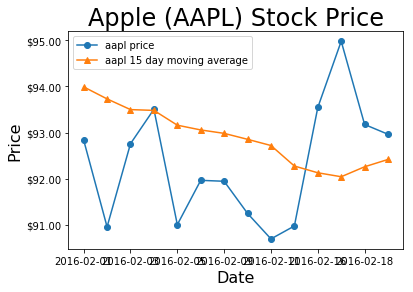

In [9]:
plot_price_no_gaps(
    'aapl', 
    title="Apple (AAPL) Stock Price",
    start=pd.Timestamp('2016-02-01'),
    end=pd.Timestamp('2016-02-20'),
    window_size=15,
    returns=False)

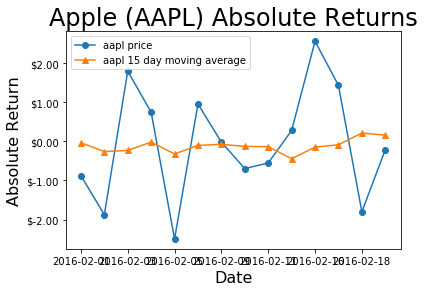

In [10]:
import warnings
warnings.filterwarnings("ignore")
plot_price_no_gaps(
    'aapl', 
    title="Apple (AAPL) Absolute Returns",
    start=pd.Timestamp('2016-02-01'),
    end=pd.Timestamp('2016-02-20'),
    window_size=15,
    abs_returns=True)

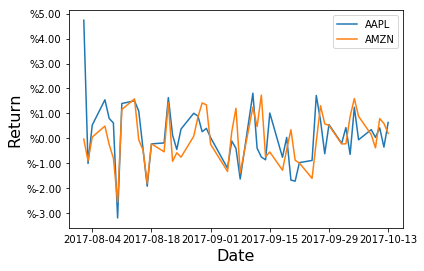

In [11]:
plot_price(
    'aapl', 'amzn',
    returns=True,
    start=pd.Timestamp('2017-08-01'),
    end=pd.Timestamp('2017-10-15'),
    title='')

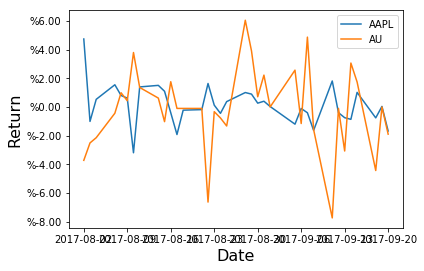

In [12]:
plot_price(
    'aapl', 'au',
    returns=True,
    start=pd.Timestamp('2017-08-01'),
    end=pd.Timestamp('2017-09-20'),
    title='')

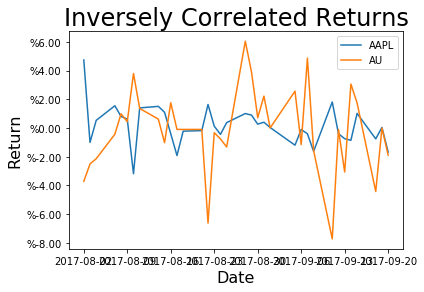

In [13]:
plot_price(
    'aapl', 'au',
    returns=True,
    start=pd.Timestamp('2017-08-01'),
    end=pd.Timestamp('2017-09-20'),
    title='Inversely Correlated Returns')

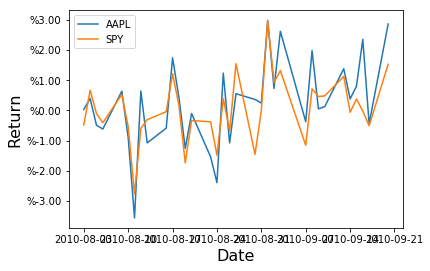

In [14]:
plot_price(
    'aapl', 'spy',
    returns=True,
    start=pd.Timestamp('2010-08-01'),
    end=pd.Timestamp('2010-09-20'))

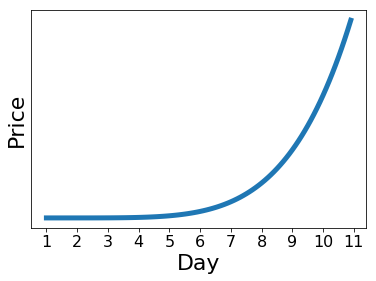

In [16]:
num_points =100
plt.plot(np.arange(num_points) ** 5.0, linewidth=5)

plt.xlabel('Day', fontsize=22)
plt.gca().set_xticks(range(0, num_points + 10, 10))
plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: 1 + int(x / 10)))
plt.setp(plt.gca().get_xticklabels(), fontsize=16)

plt.ylabel('Price', fontsize=22)
plt.yticks([], [])

plt.savefig('price_momentum.svg')
plt.show()

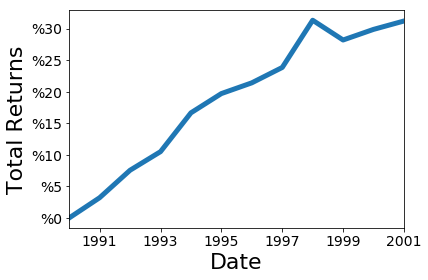

In [246]:
ONLY_SHOW_EARLY = True

pnl = [
    # 1990
    0,
    3.2,
    7.55,
    10.5,
    16.65,
    19.7,
    21.4,
    23.84,
    31.32,
    28.19,
    # 2000
    29.87,
    31.2,
    28.6,
    27.4,
    28.3,
    28.25,
    28.78,
    # 2007
    26.31,
    24.52,
    24.35,
    # 2010
    26.15,
    25.1,
    23.73,
    23.56,
    23.24,
    22.96,
    23.91,
    24.7,
    24.65
]
dates = [np.datetime64(str(year)) for year in range(1990, 2100)][:len(pnl)]

if ONLY_SHOW_EARLY:
    dates = dates[:12]
    pnl = pnl[:12]

_, ax = plt.subplots()
ax.plot(dates, pnl, linewidth=5)
if not ONLY_SHOW_EARLY:
    ax.axvline(x=np.datetime64('2001'), color='black', dashes=[2, 2], linewidth=3.0)

plt.xlabel('Date', fontsize=22)
plt.xlim([min(dates), max(dates)])

plt.ylabel('Total Returns', fontsize=22)
yaxis_formatter = matplotlib.ticker.FuncFormatter(lambda x, p: f'%{x:.0f}')
ax.yaxis.set_major_formatter(yaxis_formatter)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

plt.savefig('pnl_total.svg')
plt.show()

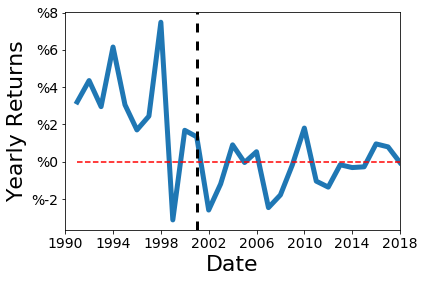

In [239]:
_, ax = plt.subplots()
ax.plot(dates[1:], np.diff(np.array(pnl), n=1), linewidth=5)
ax.plot(dates[1:], np.zeros(len(dates[1:])), 'r--')
ax.axvline(x=np.datetime64('2001'), color='black', dashes=[3, 3], linewidth=3.0)

plt.xlabel('Date', fontsize=22)
plt.xlim([dates[:1], dates[-1]])

plt.ylabel('Yearly Returns', fontsize=22)
yaxis_formatter = matplotlib.ticker.FuncFormatter(lambda x, p: f'%{x:.0f}')
ax.yaxis.set_major_formatter(yaxis_formatter)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

plt.savefig('pnl_yearly.svg')
plt.show()